<a href="https://colab.research.google.com/github/shironoirL/pythonProject/blob/master/ludik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)  # or 199
pd.options.mode.chained_assignment = None
%matplotlib inline

In [186]:
from google.colab import drive
drive.mount ('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [187]:
data = pd.read_json('/content/drive/MyDrive/csvs/bets.json')

In [188]:

data.head()

,bet_id,balance_type,balance_type_win,bet_uid,bet_sum,bet_win,bet_win_real,create_dttm,game_kind,key,other,possible_win,result_dttm,status
0,914550,money,money,None,200,0.0,0.0,2022-09-09T11:29:41.377,14,5c526d69bfab67189412ceded36c2842334fb2a1da8f1d54d4fed4eaf9ccfb4a,"{'Id': 169, 'coeff': None, 'bet_type': None, 'outcomes': [], 'insurance_id': 0, 'insurance_sum': 0, 'events_to_guess': None}",0.0,2022-09-09T11:29:41.377,loss
1,1548239,money,money,None,50,0.0,0.0,2022-09-10T00:16:33.813,6,55840b5f98d4bf47c6fb0e273cdbc1fd203758b6e206baa962dcaedecf409950,"{'Id': 153, 'coeff': None, 'bet_type': None, 'outcomes': [], 'insurance_id': 0, 'insurance_sum': 0, 'events_to_guess': None}",0.0,2022-09-10T00:16:33.813,loss
2,5273333,money,money,18d07faf-7f09-443e-bf74-794c4476e69d,5000,6750.0,6750.0,2022-09-07T09:52:58.911,2,a61111a1f96b7a3f2134757200f7d74ccde8fdb3e528849d3a7bd4c5929e00e5,"{'Id': 222, 'coeff': 1.35, 'bet_type': 'Single', 'outcomes': [{'Id': 200, 'name': 'Победит BETBOOM TEAM', 'coeff': 1.35, 'status': 'win', 'is_live': True, 'event_id': 'od:match:104857', 'sport_id': 'od:sport:2', 'is_active': True, 'type_name': 'Исход с учетом доп раундов', 'event_name': 'Outsiders - BETBOOM TEAM', 'sport_name': 'Dota 2', 'period_name': '', 'tournament_name': 'The International 2022: Eastern Europe Qualifier', 'event_start_date': '2022-09-07T08:30:00', 'team_side_1_name': 'Outsiders', 'team_side_2_name': 'BETBOOM TEAM'}], 'insurance_id': 0, 'insurance_sum': 0, 'events_to_guess': None}",6750.0,2022-09-07T11:22:19.268,win
3,8766575,money,money,9b73e806-fda1-4af6-828c-896ca1da9a04,10000,0.0,0.0,2022-10-16T12:43:52.205,2,00ae8fc66fa2a042316dbd8b846d6d63c93f5fe2dac016c5a3805674404538aa,"{'Id': 326, 'coeff': 1.4, 'bet_type': 'Single', 'outcomes': [{'Id': 325, 'name': 'Победит Entity', 'coeff': 1.4, 'status': 'loss', 'is_live': True, 'event_id': 'od:match:114914', 'sport_id': 'od:sport:2', 'is_active': True, 'type_name': 'Исход с учетом доп раундов', 'event_name': 'Fnatic - Entity', 'sport_name': 'Dota 2', 'period_name': 'Карта 2', 'tournament_name': 'The International 2022', 'event_start_date': '2022-10-16T11:25:00', 'team_side_1_name': 'Fnatic', 'team_side_2_name': 'Entity'}], 'insurance_id': 0, 'insurance_sum': 0, 'events_to_guess': None}",14000.0,2022-10-16T13:28:39.571,loss
4,22135807,money,money,a703a468-1257-47ef-adfb-3eef3fc2af81,800,0.0,0.0,2022-10-16T04:05:35.951,2,14fdaf967e1a6ddbd89cbbe3e9ad47ed5c543bad6217216e65d169e8162c3196,"{'Id': 292, 'coeff': 3.6, 'bet_type': 'Single', 'outcomes': [{'Id': 294, 'name': 'Победит Talon Esports', 'coeff': 3.6, 'status': 'loss', 'is_live': True, 'event_id': 'od:match:114933', 'sport_id': 'od:sport:2', 'is_active': True, 'type_name': 'Исход с учетом доп раундов', 'event_name': 'Team Spirit - Talon Esports', 'sport_name': 'Dota 2', 'period_name': 'Карта 2', 'tournament_name': 'The International 2022', 'event_start_date': '2022-10-16T02:00:00', 'team_side_1_name': 'Team Spirit', 'team_side_2_name': 'Talon Esports'}], 'insurance_id': 0, 'insurance_sum': 0, 'events_to_guess': None}",2880.0,2022-10-16T04:18:36.797,loss


In [189]:
data.describe()
data.other

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          {'Id': 169, 'coeff': None, 'bet_type': None, 'outcomes': [], 'insurance_id': 0, 'insurance_sum': 0, 'events_to_guess': None}
1                                                                                                                                                                                                                                                                                                                                                                                               

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bet_id            430 non-null    int64  
 1   balance_type      430 non-null    object 
 2   balance_type_win  430 non-null    object 
 3   bet_uid           428 non-null    object 
 4   bet_sum           430 non-null    int64  
 5   bet_win           430 non-null    float64
 6   bet_win_real      430 non-null    float64
 7   create_dttm       430 non-null    object 
 8   game_kind         430 non-null    int64  
 9   key               430 non-null    object 
 10  other             430 non-null    object 
 11  possible_win      430 non-null    float64
 12  result_dttm       430 non-null    object 
 13  status            430 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 47.2+ KB


In [191]:
def addColumn(column):
  tempList = []
  for x in range(len(data)):
    if x==0:
      tempList.append(0)
    elif x==1:
      tempList.append(0)
    else:
      tempList.append(data.other[x]['outcomes'][0][column])
  data[column] = tempList

In [192]:
addColumn('event_name')
addColumn('team_side_1_name')
addColumn('team_side_2_name')
addColumn('type_name')
addColumn('coeff')
addColumn('name')

In [193]:
data = data.drop(columns=['key','create_dttm', 'bet_uid', 'balance_type', 'game_kind', 'key','other'])

In [194]:
data.shape

(430, 14)

In [195]:
data.columns

Index(['bet_id', 'balance_type_win', 'bet_sum', 'bet_win', 'bet_win_real',
       'possible_win', 'result_dttm', 'status', 'event_name',
       'team_side_1_name', 'team_side_2_name', 'type_name', 'coeff', 'name'],
      dtype='object')

In [196]:
data.loc[3:4]

,bet_id,balance_type_win,bet_sum,bet_win,bet_win_real,possible_win,result_dttm,status,event_name,team_side_1_name,team_side_2_name,type_name,coeff,name
3,8766575,money,10000,0.0,0.0,14000.0,2022-10-16T13:28:39.571,loss,Fnatic - Entity,Fnatic,Entity,Исход с учетом доп раундов,1.4,Победит Entity
4,22135807,money,800,0.0,0.0,2880.0,2022-10-16T04:18:36.797,loss,Team Spirit - Talon Esports,Team Spirit,Talon Esports,Исход с учетом доп раундов,3.6,Победит Talon Esports


In [197]:
newdata = data[2:]

In [198]:
data.head()

,bet_id,balance_type_win,bet_sum,bet_win,bet_win_real,possible_win,result_dttm,status,event_name,team_side_1_name,team_side_2_name,type_name,coeff,name
0,914550,money,200,0.0,0.0,0.0,2022-09-09T11:29:41.377,loss,0,0,0,0,0.00,0
1,1548239,money,50,0.0,0.0,0.0,2022-09-10T00:16:33.813,loss,0,0,0,0,0.00,0
2,5273333,money,5000,6750.0,6750.0,6750.0,2022-09-07T11:22:19.268,win,Outsiders - BETBOOM TEAM,Outsiders,BETBOOM TEAM,Исход с учетом доп раундов,1.35,Победит BETBOOM TEAM
3,8766575,money,10000,0.0,0.0,14000.0,2022-10-16T13:28:39.571,loss,Fnatic - Entity,Fnatic,Entity,Исход с учетом доп раундов,1.40,Победит Entity
4,22135807,money,800,0.0,0.0,2880.0,2022-10-16T04:18:36.797,loss,Team Spirit - Talon Esports,Team Spirit,Talon Esports,Исход с учетом доп раундов,3.60,Победит Talon Esports


In [199]:
newdata.describe()
newdata.hist()

,bet_id,bet_sum,bet_win,bet_win_real,possible_win,coeff
count,4.280000e+02,428.000000,428.000000,428.000000,428.000000,428.000000
mean,1.050775e+09,5570.168224,5683.236449,5683.236449,9723.206846,2.261706
std,6.374233e+08,4905.377583,7715.120737,7715.120737,7015.822711,1.857955
min,5.273333e+06,100.000000,0.000000,0.000000,235.000000,1.080000
25%,4.653508e+08,3000.000000,0.000000,0.000000,5455.000000,1.400000
50%,1.019109e+09,5000.000000,3405.000000,3405.000000,8000.000000,1.650000
75%,1.613468e+09,7000.000000,8430.000000,8430.000000,12037.500000,2.112500
max,2.146338e+09,50000.000000,58500.000000,58500.000000,58500.000000,15.000000


In [200]:
newdata.coeff = newdata.coeff.astype(float)

In [212]:
data.describe()

,bet_id,bet_sum,bet_win,bet_win_real,possible_win,coeff
count,4.300000e+02,430.000000,430.000000,430.000000,430.000000,430.000000
mean,1.045893e+09,5544.841860,5656.802791,5656.802791,9677.982628,2.251186
std,6.399420e+08,4907.969005,7706.845634,7706.845634,7030.718002,1.860011
min,9.145500e+05,50.000000,0.000000,0.000000,0.000000,0.000000
25%,4.536664e+08,3000.000000,0.000000,0.000000,5410.000000,1.400000
50%,1.016227e+09,5000.000000,3360.000000,3360.000000,7960.000000,1.650000
75%,1.611522e+09,7000.000000,8400.000000,8400.000000,12000.000000,2.100000
max,2.146338e+09,50000.000000,58500.000000,58500.000000,58500.000000,15.000000


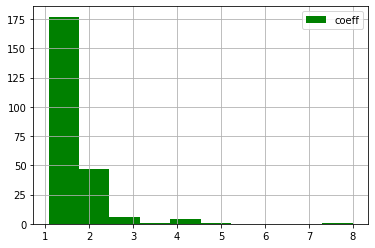

In [210]:
data[data.status=='win']["coeff"].hist(color="green", legend=True)


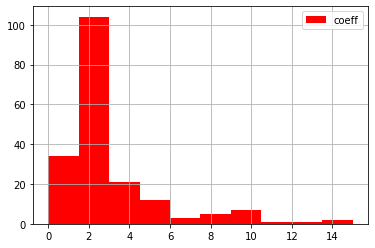

In [211]:
data[data.status=='loss']["coeff"].hist(color="red", legend=True)

In [213]:
import seaborn as sns

In [294]:
print(data[data.status=='win'][data.coeff>2].shape)
print(data[data.status=='loss'][data.coeff>2].shape)

(23, 14)
(96, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


# При кэфе выше 2

1.   119 из 430 ставок (0.276)
2.   23 победы
3. 96 поражений
4. winrate = 0.193
5. поставлено 225350
6. выйграно 80500
7. pure profit:  -144850 (-64.2% от банка)
8. Сочнейший выйгранный кэф: 4 - Felt - Team DogChamp (+18к)
9. Наибольшая сумма проеба - 5RATFORCESTAFF - KBU.US (-10к) NA DOTA KEKW





In [323]:
def winrateCalculator(firstCoeff, secondCoeff):
  a = (data[data.status=='win'][data.coeff<=firstCoeff][data.coeff>=secondCoeff].shape)[0]
  b = (data[data.status=='loss'][data.coeff<=firstCoeff][data.coeff>=secondCoeff].shape)[0]
  c = a/(a+b)
  return c


In [347]:
winrateCalculator(10, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


0.2184873949579832

#  *При кэфе ниже или равно 2* 

1.   308 из 430 ставок (0.71)
2.   214 побед
3. 94 поражений
4. winrate = 0.7
5. поставлено: 1.501.192
6. выйграно: 2.196.075
7. pure profit = 694883 (+46% от банка)
8. Самый жирный профит 15120.0 - Xtreme Gaming - Vici Gaming (с детства за папараци)
9. Наибольшая сумма проеба - 20000 goonsquad - Nigma Galaxy (ставил на продолжительность мапы, кэф был 1,32)
10. Если ставить на кэфы до 1.4 вероятность победить стремится к 80% с 1.4 до 1.6 падает до 61%


In [348]:
def winrateCalculator(firstCoeff, secondCoeff):
  #first>second
  a = (data[data.status=='win'][data.coeff<=firstCoeff][data.coeff>=secondCoeff].shape)[0]
  b = (data[data.status=='loss'][data.coeff<=firstCoeff][data.coeff>=secondCoeff].shape)[0]
  c = a/(a+b)
  return c


In [365]:
print(winrateCalculator(1.3, 1))
print(winrateCalculator(1.4, 1.1))
print(winrateCalculator(1.5, 1.2))
print(winrateCalculator(1.6, 1.3))
print(winrateCalculator(1.7, 1.4))
print(winrateCalculator(1.8, 1.5))
print(winrateCalculator(1.9, 1.6))
print(winrateCalculator(2, 1.7))
print(winrateCalculator(2.1, 1.8))

0.7966101694915254
0.7964601769911505
0.7857142857142857
0.74
0.6890756302521008
0.6122448979591837
0.5824175824175825
0.573170731707317
0.5070422535211268


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [410]:
data.loc[147]

bet_id                             677488219
balance_type_win                       money
bet_sum                                20000
bet_win                                  0.0
bet_win_real                             0.0
possible_win                         26400.0
result_dttm          2022-09-13T12:17:35.233
status                                  loss
event_name          goonsquad - Nigma Galaxy
team_side_1_name                   goonsquad
team_side_2_name                Nigma Galaxy
type_name            Продолжительность карты
coeff                                   1.32
name                               Больше 36
Name: 147, dtype: object

In [403]:
(data[data.status=='loss'][data.coeff<=2].bet_win_real - data[data.status=='loss'][data.coeff<=2].bet_sum).nsmallest()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


147   -20000.0
145   -15000.0
28    -12000.0
3     -10000.0
47    -10000.0
dtype: float64

In [398]:
data[data.status=='win'][data.coeff<=2].bet_sum.nlargest()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


276    50000
56     36000
421    30000
428    30000
258    24000
Name: bet_sum, dtype: int64

In [386]:
1-(80500 / 225350)

0.6427779010428223